# Breast Cancer subtype prediction based on CNA 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

###   get the patient id and corresponding cancer type 

In [3]:
df_cancer_type = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/Cancer_Type_Detailed.txt')
df_cancer_type.loc[:,'Cancer Type Detailed'].value_counts()

Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: Cancer Type Detailed, dtype: int64

### assgin numerical value for cancer types for classification (from most common to least)
0: Breast Invasive Ductal Carcinoma \
1: Breast Mixed Ductal and Lobular Carcinoma\
2: Breast Invasive Lobular Carcinoma\
3: Invasive Breast Carcinoma\
4: Breast Invasive Mixed Mucinous Carcinoma\
5: Breast\
6: Breast Angiosarcoma\
7: Metaplastic Breast Cancer 

In [4]:
df_cancer_type['Cancer'] = df_cancer_type['Cancer Type Detailed']
df_cancer_type['Cancer'] = df_cancer_type['Cancer'].map({'Breast Invasive Ductal Carcinoma':0, 
                                                         'Breast Mixed Ductal and Lobular Carcinoma':1,
                                                         'Breast Invasive Lobular Carcinoma':2,
                                                         'Invasive Breast Carcinoma':3,
                                                         'Breast Invasive Mixed Mucinous Carcinoma':4,
                                                         'Breast':5,
                                                         'Breast Angiosarcoma':6,
                                                         'Metaplastic Breast Cancer':7})
df_cancer_type

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Cancer
0,brca_metabric,MB-0000,MB-0000,Breast Invasive Ductal Carcinoma,0
1,brca_metabric,MB-0002,MB-0002,Breast Invasive Ductal Carcinoma,0
2,brca_metabric,MB-0005,MB-0005,Breast Invasive Ductal Carcinoma,0
3,brca_metabric,MB-0006,MB-0006,Breast Mixed Ductal and Lobular Carcinoma,1
4,brca_metabric,MB-0008,MB-0008,Breast Mixed Ductal and Lobular Carcinoma,1
...,...,...,...,...,...
2504,brca_metabric,MTS-T2428,MTS-T2428,Invasive Breast Carcinoma,3
2505,brca_metabric,MTS-T2429,MTS-T2429,Invasive Breast Carcinoma,3
2506,brca_metabric,MTS-T2430,MTS-T2430,Invasive Breast Carcinoma,3
2507,brca_metabric,MTS-T2431,MTS-T2431,Invasive Breast Carcinoma,3


# CNA 

In [5]:
df_cna = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/data_cna.txt')
df_cna

,Hugo_Symbol,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,A1BG,1.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A1CF,29974.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,A2M,2.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A2M-AS1,144571.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,ZYG11A,NaN,0,0,1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22540,ZYG11B,79699.0,0,0,-1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22541,ZYX,7791.0,0,-1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
22542,ZZEF1,23140.0,0,0,-2,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [6]:
#find cancer type with same patient id in cna data
cna_cancer_type = ['','']
for i in range(np.shape(df_cna)[1])[2:]:
    cna_cancer_type.append(df_cancer_type.loc[df_cancer_type['Sample ID'] == df_cna.columns.values[i], 'Cancer' ].iloc[0])

#add cancer type to cna data
df_cna = df_cna.transpose().assign(cancer = cna_cancer_type)
df_cna.rename(columns=df_cna.iloc[0], inplace = True)
df_cna.drop(df_cna.index[0:2], inplace = True)
df_cna.rename(columns = {'':'cancer'}, inplace = True)
#df_cna.reset_index(inplace=True)
#df_cna.rename(columns = {'index':'PATIENT_ID'}, inplace = True)
df_cna

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer
MB-0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
MB-0045,-1,-1,0,-1,-1,-1,-1,0,0,2,...,0,0,0,0,1,-1,0,-2,0,0
MB-0046,0,0,0,-1,-1,-1,-1,0,-1,0,...,0,-1,-1,0,0,0,0,-1,0,0
MB-0048,0,0,1,0,0,0,0,0,-1,0,...,1,0,0,0,0,0,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,2.0,0
MB-6213,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
MB-6230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0
MB-7148,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


-2 or Deep Deletion indicates a deep loss, possibly a homozygous deletion\
-1 or Shallow Deletion indicates a shallow loss, possibley a heterozygous deletion\
0 is diploid\
1 or Gain indicates a low-level gain (a few additional copies, often broad)\
2 or Amplification indicate a high-level amplification (more copies, often focal)\

<AxesSubplot:>

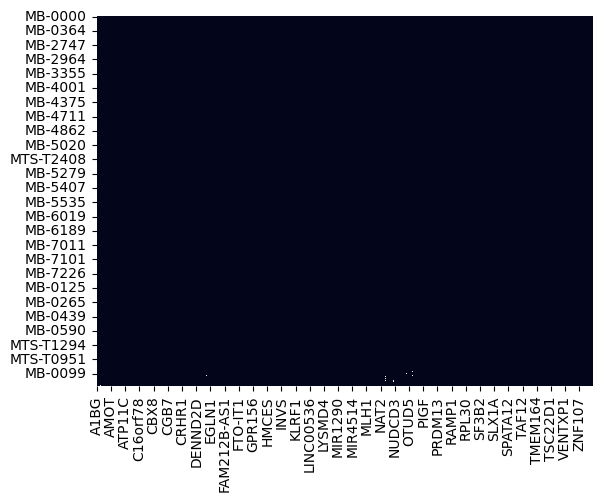

In [13]:
#check if there are any missing data 
sns.heatmap(df_cna.isnull(), cbar=False)

In [7]:
df_cna.dropna(inplace=True)

In [35]:
np.where(pd.isnull(df_cna)) 

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df_cna.describe()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer
count,2091,2091,2091,2091,2091,2091,2091,2091,2091,2091,...,2091,2091,2091,2091,2091,2091,2091,2091,2091,2091
unique,5,5,4,5,5,5,5,4,5,4,...,4,5,5,4,5,5,4,5,4,7
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
freq,1662,1661,1716,1622,1624,1619,1628,1616,1309,1735,...,1716,1539,1536,1728,1545,1535,1581,1038,1611,1615


## Data Visualization 

In [10]:
X,y  = df_cna.drop('cancer', axis=1), df_cna[['cancer']].values.flatten()
X.head().sample(10, axis=1)

,KCNS2,LIFR,AK2,FAM231B,LMNA,MIR548C,OR51B6,WBP11P1,LACRT,MIR4650-2
MB-0000,0,0,0,0,0,0,0,0,0,0
MB-0039,0,0,0,0,0,0,0,0,0,0
MB-0045,0,0,0,-1,2,0,-1,-1,0,-1
MB-0046,0,0,0,0,2,0,0,0,0,0
MB-0048,1,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(2091, 22544)

In [12]:
import umap 
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
manifold = umap.UMAP().fit(X,y)
X_reduced = manifold.transform(X)
X_reduced.shape

(2091, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


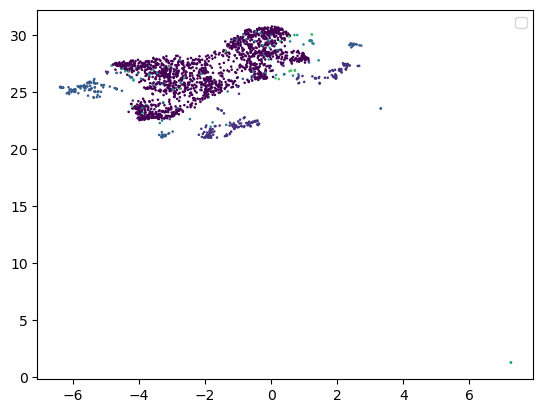

In [16]:
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=y, s=0.7)
plt.legend()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer

pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer())
X = pipe.fit_transform(X.copy())

# Fit UMAP to processed data
manifold = umap.UMAP().fit(X, y)
X_reduced_2 = manifold.transform(X)

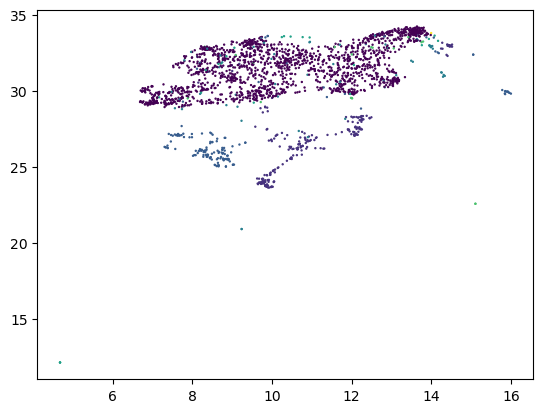

In [18]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=y, s=0.5)

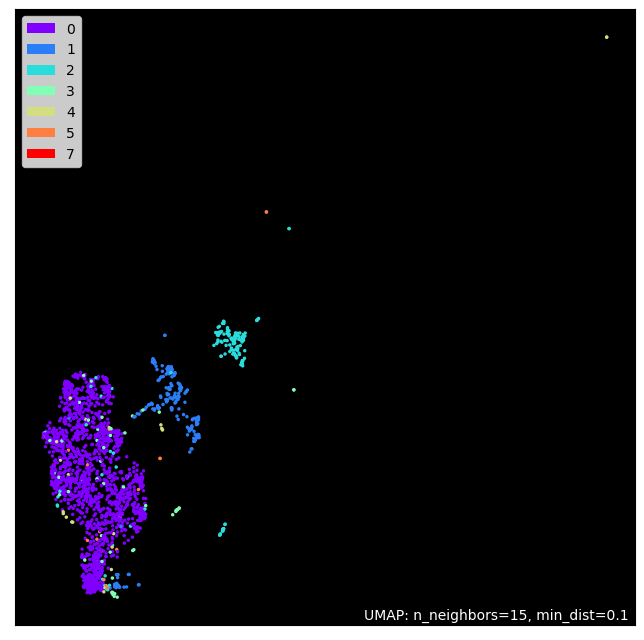

In [19]:
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

# Encode the target to numeric
y_encoded = pd.factorize(y)[0]

manifold = umap.UMAP().fit(X, y_encoded)

import umap.plot  # pip install umap-learn[plot]

umap.plot.points(manifold, labels=y, theme="fire");

large feature number and medium sample --> use svm 